<a href="https://colab.research.google.com/github/itzrnvr/opencv-labs/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
IMAGE_PATH_ROAD = "road.jpg"
IMAGE_PATH_DOG = "dogg.jpeg"

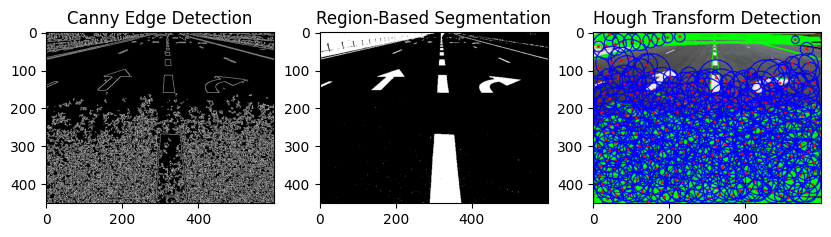

In [8]:
imgA = cv2.imread(IMAGE_PATH_ROAD)
grayA = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
cannyA = cv2.Canny(grayA, 50, 150)
_, thA = cv2.threshold(grayA, 128, 255, cv2.THRESH_BINARY)
li = cv2.HoughLinesP(cannyA, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
if li is not None:
  for ln in li:
    a,b,c,d = ln[0]
    cv2.line(imgA, (a,b), (c,d), (0,255,0), 2)
cc = cv2.HoughCircles(grayA, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=10, maxRadius=50)
if cc is not None:
  cc = np.uint16(np.around(cc))
  for circ in cc[0, :]:
    cv2.circle(imgA, (circ[0], circ[1]), circ[2], (255,0,0), 2)
    cv2.circle(imgA, (circ[0], circ[1]), 2, (0,0,255), 3)
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1); plt.imshow(cannyA, cmap='gray'); plt.title('Canny Edge Detection')
plt.subplot(1,3,2); plt.imshow(thA, cmap='gray'); plt.title('Region-Based Segmentation')
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(imgA, cv2.COLOR_BGR2RGB)); plt.title('Hough Transform Detection')
plt.show()

Task 2

In [9]:
!pip install opencv-python
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 90.2MB/s]



0: 480x640 1 dog, 41.4ms
Speed: 15.4ms preprocess, 41.4ms inference, 344.7ms postprocess per image at shape (1, 3, 480, 640)


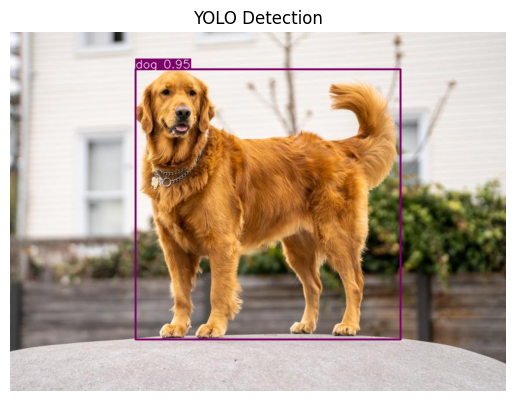

In [10]:
import cv2
from ultralytics import YOLO
yolo_model = YOLO("yolov8n.pt")
imgB = cv2.imread(IMAGE_PATH_DOG)
preds = yolo_model(imgB)
for res in preds:
  canvas = res.plot()
  plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
  plt.title('YOLO Detection')
  plt.axis('off')
  plt.show()

Task 2.2

In [11]:
pip install opencv-python tensorflow keras

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


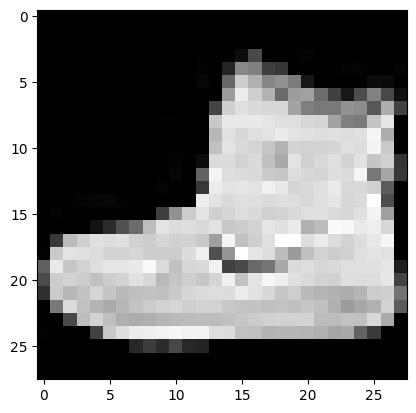

In [12]:
from tensorflow.keras.datasets import fashion_mnist, cifar100
import matplotlib.pyplot as plt
dsA = fashion_mnist.load_data()
dsB = cifar100.load_data()
(X_train, y_train), (X_test, y_test) = dsA
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = dsB
plt.imshow(X_train[0], cmap="gray")
plt.show()

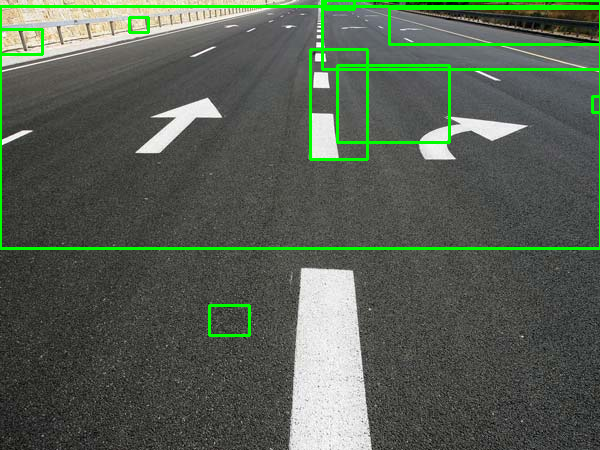

In [13]:
import cv2
from google.colab.patches import cv2_imshow
def sel_search(img):
  seg = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
  seg.setBaseImage(img)
  seg.switchToSelectiveSearchFast()
  areas = seg.process()
  return areas
imgC = cv2.imread(IMAGE_PATH_ROAD)
rct = sel_search(imgC)
for x, y, w, h in rct[:10]:
  cv2.rectangle(imgC, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(imgC)

In [16]:
!pip install --upgrade tensorflow # Update TensorFlow to the latest version.
!pip install --upgrade "jax[cuda11_local]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html # Install JAX with CUDA 11 support

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 116.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have te

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 79.9 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.5.1
    Uninstalling jaxlib-0.5.1:
      Successfully uninstalled jaxlib-0.5.1
  Attempting uninstall: jax
    Found existing installation: jax 0.5.2
    Uninstalling jax-0.5.2:
      Successfully uninstalled jax-0.5.2


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
X_train_norm = np.expand_dims(X_train, -1) / 255.0
X_test_norm = np.expand_dims(X_test, -1) / 255.0
mdl = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
mdl.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mdl.fit(X_train_norm, y_train, epochs=5, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-17-86be3c0074bc>", line 16, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_3306]

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred_mnist = mdl.predict(X_test_norm)
labels_mnist = np.argmax(pred_mnist, axis=1)
acc_mnist = accuracy_score(y_test, labels_mnist)
print(f"Accuracy: {acc_mnist:.4f}")
print("Classification Report:")
print(classification_report(y_test, labels_mnist))
print("Confusion Matrix:")
print(confusion_matrix(y_test, labels_mnist))

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-15-e2778a853319>", line 3, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_data_distributed_1710]

In [ ]:
from tensorflow.keras.utils import to_categorical
X_train_cifar = X_train_cifar.astype(np.float32) / 255.0
X_test_cifar = X_test_cifar.astype(np.float32) / 255.0
y_train_cifar_cat = to_categorical(y_train_cifar, 100)
y_test_cifar_cat = to_categorical(y_test_cifar, 100)
print("X_train shape:", X_train_cifar.shape)
print("y_train shape:", y_train_cifar_cat.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
modelC = Sequential([
  Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(32,32,3)),
  BatchNormalization(),
  Conv2D(32, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  MaxPooling2D((2,2)),
  Dropout(0.25),
  Conv2D(64, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  Conv2D(64, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  MaxPooling2D((2,2)),
  Dropout(0.25),
  Conv2D(128, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  Conv2D(128, (3,3), activation="relu", padding="same"),
  BatchNormalization(),
  MaxPooling2D((2,2)),
  Dropout(0.25),
  Flatten(),
  Dense(512, activation="relu"),
  BatchNormalization(),
  Dropout(0.5),
  Dense(100, activation="softmax")
])
modelC.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
modelC.summary()
train_hist = modelC.fit(X_train_cifar, y_train_cifar_cat, epochs=25, batch_size=64, validation_data=(X_test_cifar, y_test_cifar_cat))

In [ ]:
pred_cifar = modelC.predict(X_test_cifar)
pred_labels_cifar = np.argmax(pred_cifar, axis=1)
actual_labels_cifar = y_test_cifar.flatten()
score = accuracy_score(actual_labels_cifar, pred_labels_cifar)
print(f"Accuracy (sklearn): {score:.4f}")
print("Classification Report:")
print(classification_report(actual_labels_cifar, pred_labels_cifar))
print("Confusion Matrix:")
print(confusion_matrix(actual_labels_cifar, pred_labels_cifar))